In [1]:
from numpy import random, int32
import numpy as np
import matplotlib.pyplot as plt
import time

INT_MAX = 2 ** 31 - 1

In [2]:
# Define the threshold for switching to Insertion Sort
S = 5
# num_cmp = 0

In [3]:
def print_array(arr):
    """Function to print the array"""
    print(" ".join(map(str, arr)))

In [4]:
def generate_random_array(n, max_value):
    """Function to generate a random array"""
    return random.randint(0, max_value, n, dtype=int32).tolist()

In [5]:
def insertion_sort(arr, left, right):
    """Function to perform Insertion Sort"""
    num_cmp = 0
    for i in range(left + 1, right + 1):
        for j in range(i, left, -1):
            num_cmp += 1  # Count the number of comparisons
            if arr[j - 1] > arr[j]:
                arr[j - 1], arr[j] = arr[j], arr[j - 1]
            else:
                break
    return num_cmp

In [6]:
def merge(arr, left, mid, right):
    """Function to merge two sorted halves"""
    num_cmp = 0

    # Create temporary arrays
    L = arr[left:mid+1]
    R = arr[mid+1:right+1]

    # Merge the temp arrays back into arr[left..right]
    i = 0
    j = 0
    k = left
    while i < len(L) and j < len(R):
        num_cmp += 1 # num_cmp is incremented here
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
            k += 1
            continue

        num_cmp += 1 # num_cmp is incremented here
        if L[i] > R[j]:
            arr[k] = R[j]
            j += 1
            k += 1
            continue
        
        if i == mid and j == right:
            break

        arr[k] = L[i]
        i += 1
        k += 1

        arr[k] = R[j]
        j += 1
        k += 1
    return num_cmp

In [7]:
def hybrid_merge_sort(arr, left, right):
    """Function to implement the hybrid Merge-Insertion Sort"""
    if right - left + 1 <= S:
        # If subarray size is less than or equal to S, use Insertion Sort
        return insertion_sort(arr, left, right)
    else:
        num_cmp = 0

        # Otherwise, use Merge Sort
        mid = (right + left) // 2

        # Recursively sort the two halves
        num_cmp += hybrid_merge_sort(arr, left, mid)
        num_cmp += hybrid_merge_sort(arr, mid + 1, right)

        # Merge the sorted halves
        num_cmp += merge(arr, left, mid, right)
        return num_cmp

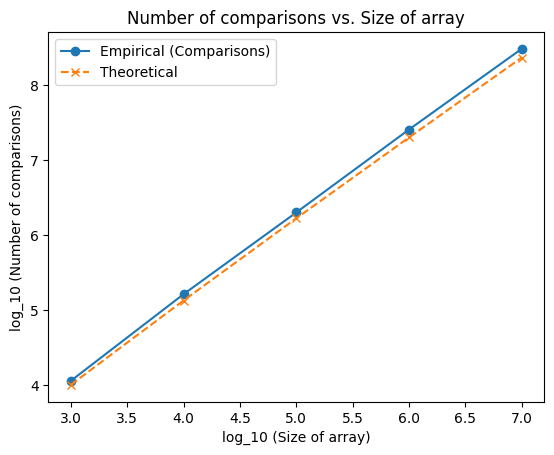

In [8]:
# (ci)
# Plot the graph of the number of comparisons vs. the size of the array

arr_num_cmp = [0] * 5 # Array to store the number of comparisons
for i in range(1, 6):
    # Generate a random array
    arr = generate_random_array(10**(i+2), INT_MAX)

    # Apply hybrid merge sort
    S = 5
    num_cmp = hybrid_merge_sort(arr, 0, len(arr) - 1)

    # Store the number of comparisons
    arr_num_cmp[i-1] = num_cmp

# Given sizes and empirical data (arr_num_cmp)
sizes = [10**(i+2) for i in range(1, 6)]


# Theoretical time complexity based on the formula you provided
def theoretical_formula(n):
    return n * np.log2(n / 16) + 4 * n

# Apply log base 10 to the x-axis
def log_10(n):
    return np.log2(n) / np.log2(10)

# Calculate theoretical comparisons for each size
theoretical_cmp = [theoretical_formula(n) for n in sizes]

# Ensure arr_num_cmp has the same length as sizes
arr_num_cmp = [0] * len(sizes)
for i in range(len(sizes)):
    arr = generate_random_array(sizes[i], INT_MAX)
    num_cmp = hybrid_merge_sort(arr, 0, len(arr) - 1)
    arr_num_cmp[i] = num_cmp

# Plot empirical data
plt.plot(log_10(sizes), log_10(arr_num_cmp), marker='o', label='Empirical (Comparisons)')

# Plot theoretical data
plt.plot(log_10(sizes), log_10(theoretical_cmp), marker='x', linestyle='--', label='Theoretical')

# Labels and title
plt.xlabel('log_10 (Size of array)')
plt.ylabel('log_10 (Number of comparisons)')
plt.title('Number of comparisons vs. Size of array')

# Add a legend
plt.legend()

# Display the graph
plt.show()



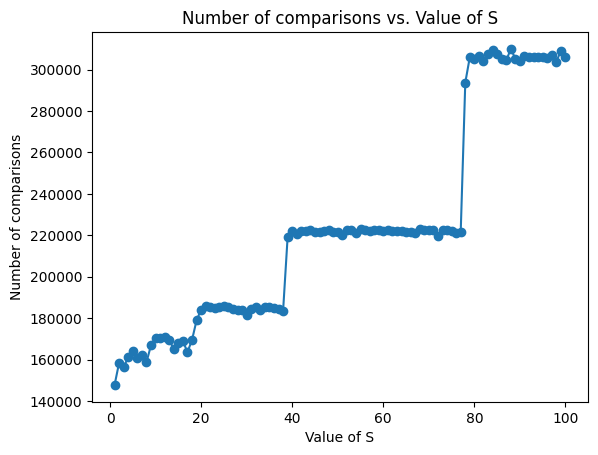

In [9]:
# (cii)
# Plot the graph for (cii) number of comparisons vs. value of S (with size of array fixed at 10^4)
S_values = [x for x in range(1, 101, 1)]
arr_num_cmp = [0] * len(S_values)
# random.seed(42)

for i in range(len(S_values)):
    S = S_values[i]
    arr = generate_random_array(10**4, INT_MAX).copy()
    num_cmp = hybrid_merge_sort(arr, 0, len(arr) - 1)
    arr_num_cmp[i] = num_cmp

plt.plot(S_values, arr_num_cmp, marker='o')
plt.xlabel('Value of S')
plt.ylabel('Number of comparisons')
plt.title('Number of comparisons vs. Value of S')
plt.show()

In [10]:
# (ciii) find the optimal value of S
print(min(arr_num_cmp))
print(arr_num_cmp.index(min(arr_num_cmp)))
print(S_values[arr_num_cmp.index(min(arr_num_cmp))])


147794
0
1


In [29]:
# (d)Comparing the number of comparisons & CPU time between Merge Sort and Hybrid Sort
# Generate random array
arr = generate_random_array(10**4, INT_MAX)
arr_copy = arr.copy()
arr_num_cmp = [0] * 2
arr_cpu_time = [0] * 2

# Merge Sort
start_time = time.time()
mid = (len(arr) - 1) // 2
num_cmp = merge(arr, 0, mid, len(arr) - 1)
end_time = time.time()
arr_num_cmp[0] = num_cmp
arr_cpu_time[0] = end_time - start_time

# Hybrid Sort
start_time = time.time()
num_cmp = hybrid_merge_sort(arr_copy, 0, len(arr_copy) - 1)
end_time = time.time()
arr_num_cmp[1] = num_cmp
arr_cpu_time[1] = end_time - start_time

# Print the number of comparisons and CPU time
print("Merge Sort")
print("Number of comparisons:", arr_num_cmp[0])
print("CPU time:", arr_cpu_time[0])
print("\nHybrid Sort")
print("Number of comparisons:", arr_num_cmp[1])
print("CPU time:", arr_cpu_time[1])

Merge Sort
Number of comparisons: 10261
CPU time: 0.0

Hybrid Sort
Number of comparisons: 307443
CPU time: 0.029485702514648438
